<a href="https://colab.research.google.com/github/NedKost/MS-AAI-500-Team-Project/blob/Anova-Branch/Copy_of_Collision_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = '/content/filtered_mvc_data.csv'
data = pd.read_csv(file_path)

data.head()


,Unnamed: 0,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,13,12/14/2021,0:59,NaN,NaN,40.596620,-74.002310,"(40.59662, -74.00231)",BELT PARKWAY,NaN,...,NaN,NaN,NaN,NaN,4486564,Sedan,NaN,NaN,NaN,NaN
1,45,04/24/2022,21:40,BRONX,10452.0,40.843906,-73.924130,"(40.843906, -73.92413)",BOSCOBEL PLACE,UNIVERSITY AVENUE,...,Unspecified,NaN,NaN,NaN,4522156,Taxi,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2,68,12/09/2021,2:45,QUEENS,11422.0,40.653023,-73.738950,"(40.653023, -73.73895)",149 AVENUE,HUXLEY STREET,...,NaN,NaN,NaN,NaN,4485026,Sedan,NaN,NaN,NaN,NaN
3,69,12/06/2021,22:16,NaN,NaN,40.625730,-73.956400,"(40.62573, -73.9564)",AVENUE J,NaN,...,Unspecified,NaN,NaN,NaN,4485528,Sedan,NaN,NaN,NaN,NaN
4,73,12/01/2021,14:34,QUEENS,11692.0,40.593636,-73.797264,"(40.593636, -73.797264)",NaN,NaN,...,Unspecified,NaN,NaN,NaN,4485581,Sedan,Pick-up Truck,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55948 entries, 0 to 55947
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     55948 non-null  int64  
 1   CRASH DATE                     55948 non-null  object 
 2   CRASH TIME                     55948 non-null  object 
 3   BOROUGH                        34676 non-null  object 
 4   ZIP CODE                       34670 non-null  float64
 5   LATITUDE                       50349 non-null  float64
 6   LONGITUDE                      50349 non-null  float64
 7   LOCATION                       50349 non-null  object 
 8   ON STREET NAME                 43702 non-null  object 
 9   CROSS STREET NAME              28358 non-null  object 
 10  OFF STREET NAME                11023 non-null  object 
 11  NUMBER OF PERSONS INJURED      55948 non-null  float64
 12  NUMBER OF PERSONS KILLED       55948 non-null 

In [4]:
#converting for better time based analysis
data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])
data['CRASH TIME'] = pd.to_datetime(data['CRASH TIME']).dt.time


In [5]:
#rather redundant?
data.drop(columns=['Unnamed: 0'], inplace=True)


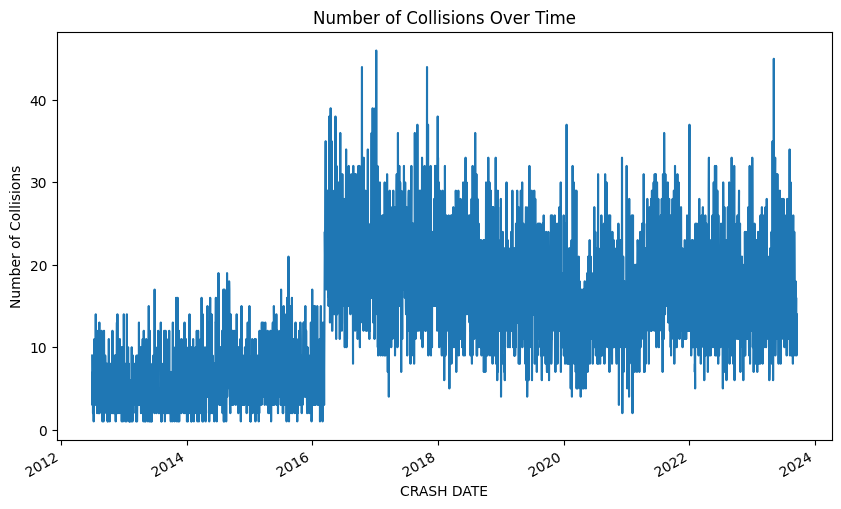

In [6]:
# visualizations help me. plotting collisions over time.
data.groupby('CRASH DATE').size().plot(figsize=(10, 6))
plt.title('Number of Collisions Over Time')
plt.ylabel('Number of Collisions')
plt.show()


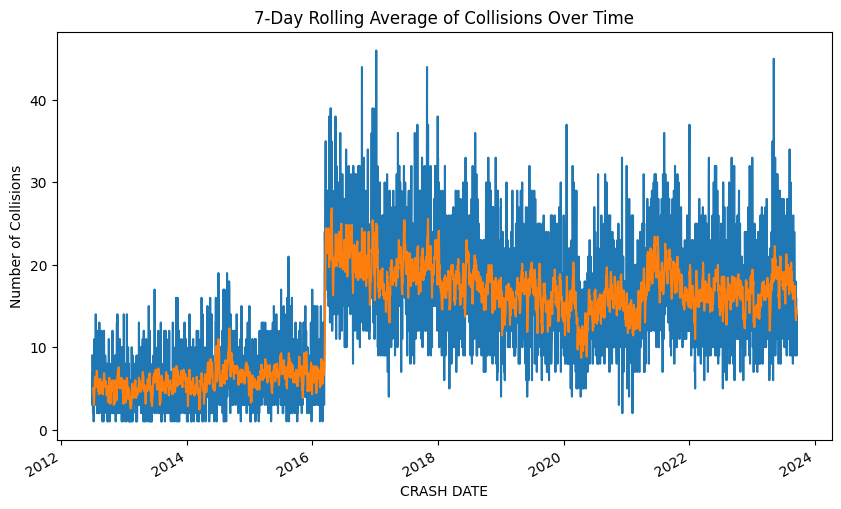

In [7]:
# add a seven day rolling average
collision_counts = data.groupby('CRASH DATE').size()

collision_counts.plot(figsize=(10, 6), lw=1.5)
plt.title('Number of Collisions Over Time')
plt.ylabel('Number of Collisions')
collision_counts.rolling(window=7).mean().plot(figsize=(10, 6), lw=1.5)
plt.title('7-Day Rolling Average of Collisions Over Time')
plt.ylabel('Number of Collisions')
plt.show()


What happened between 2016 and 2018?

In [8]:
duplicates = data.duplicated().sum()
print(f"There are {duplicates} duplicated rows in the dataset.")


There are 0 duplicated rows in the dataset.


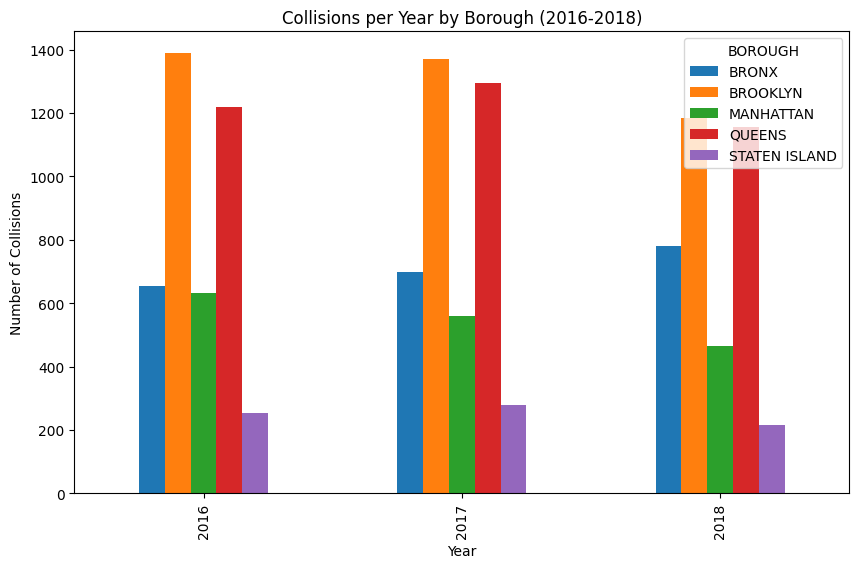

In [9]:
# Filter the data for the period 2016 to 2018
filtered_data = data[(data['CRASH DATE'] >= '01/01/2016') & (data['CRASH DATE'] <= '12/31/2018')]

# Group by year and borough
borough_collisions = filtered_data.groupby([filtered_data['CRASH DATE'].dt.year, 'BOROUGH']).size().unstack()

borough_collisions.plot(kind='bar', figsize=(10,6))
plt.title('Collisions per Year by Borough (2016-2018)')
plt.ylabel('Number of Collisions')
plt.xlabel('Year')
plt.show()


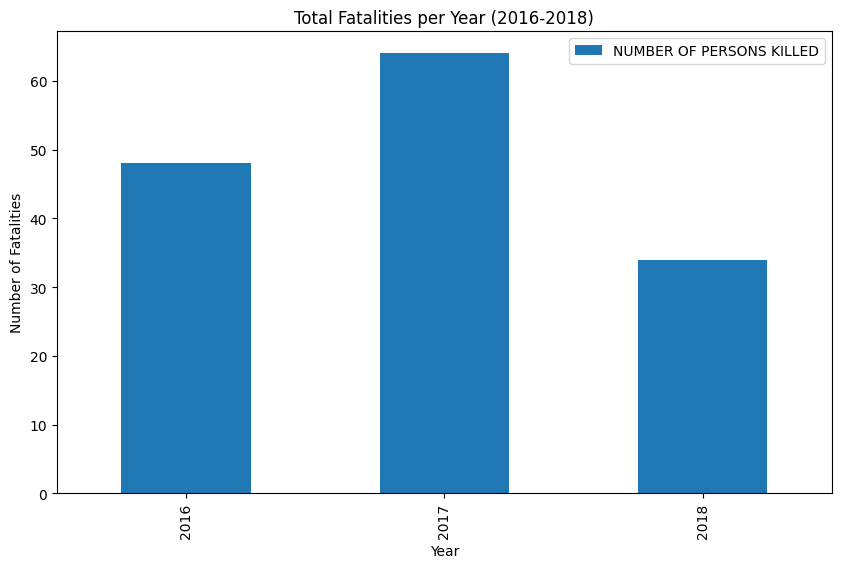

In [25]:
fatalities_by_year = filtered_data.groupby(filtered_data['CRASH DATE'].dt.year)[['NUMBER OF PERSONS KILLED']].sum()

fatalities_by_year.plot(kind='bar', figsize=(10,6))
plt.title('Total Fatalities per Year (2016-2018)')
plt.ylabel('Number of Fatalities')
plt.xlabel('Year')
plt.show()


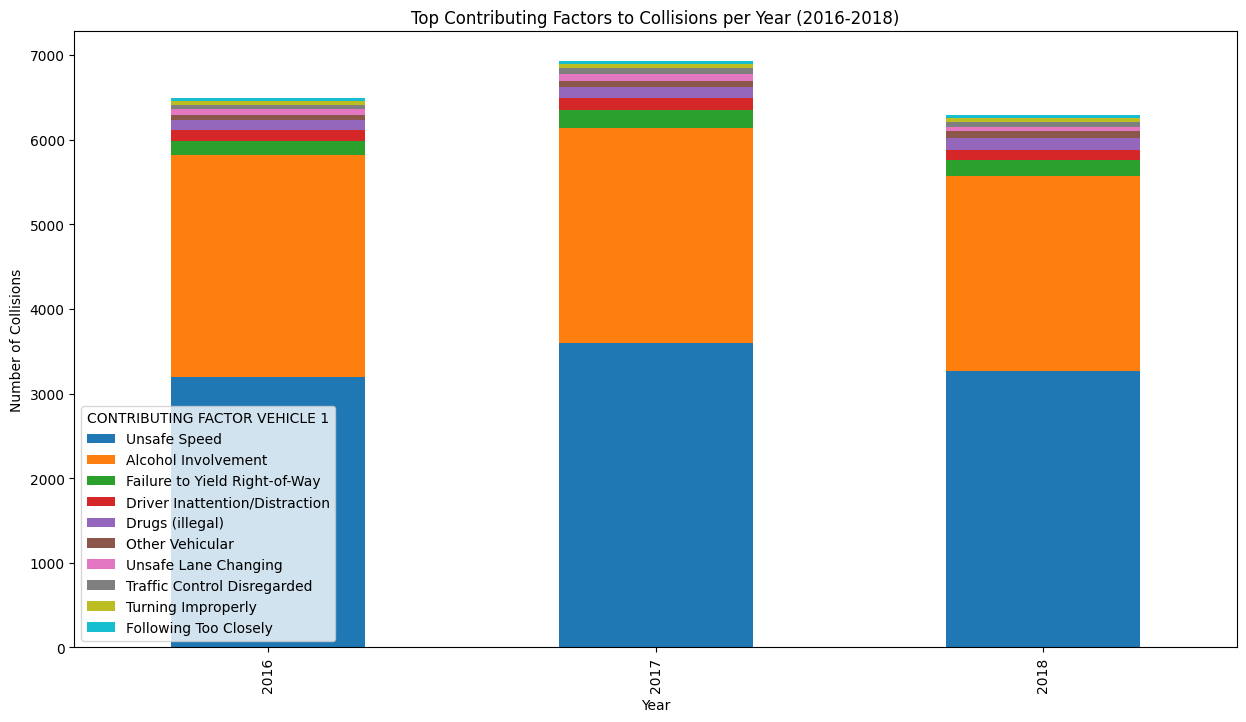

In [11]:
# Group by year and contributing factor for vehicle 1 (most common factor)
factor_collisions = filtered_data.groupby([filtered_data['CRASH DATE'].dt.year, 'CONTRIBUTING FACTOR VEHICLE 1']).size().unstack()

# Considering only the top contributing factors for better clarity in visualization
top_factors = factor_collisions.sum().nlargest(10).index
factor_collisions[top_factors].plot(kind='bar', figsize=(15,8), stacked=True)
plt.title('Top Contributing Factors to Collisions per Year (2016-2018)')
plt.ylabel('Number of Collisions')
plt.xlabel('Year')
plt.show()


Unsafe Speed saw a notable uptick

In [12]:
# Get unique values from the 'CONTRIBUTING FACTOR VEHICLE 1' column
factors = data['CONTRIBUTING FACTOR VEHICLE 1'].unique()

for factor in factors:
    print(factor)


Unsafe Speed
Alcohol Involvement
Drugs (illegal)
Drugs (Illegal)
Failure to Yield Right-of-Way
Other Vehicular
Traffic Control Disregarded
Driver Inattention/Distraction
Unsafe Lane Changing
Turning Improperly
Following Too Closely
Passing or Lane Usage Improper
Reaction to Uninvolved Vehicle
Backing Unsafely
Pedestrian/Bicyclist/Other Pedestrian Error/Confusion
Driver Inexperience
View Obstructed/Limited
Pavement Slippery
Passing Too Closely
Passenger Distraction
Obstruction/Debris
Tire Failure/Inadequate
Steering Failure
Fatigued/Drowsy
Oversized Vehicle
Aggressive Driving/Road Rage
Outside Car Distraction
Tinted Windows
Headlights Defective
Other Lighting Defects
Fell Asleep
Brakes Defective
Glare
Illnes
Pavement Defective
Lost Consciousness
Failure to Keep Right
Accelerator Defective
Cell Phone (hand-Held)
Traffic Control Device Improper/Non-Working
Lane Marking Improper/Inadequate
Animals Action
Driverless/Runaway Vehicle
Cell Phone (hands-free)
Other Electronic Device
1
Physical 

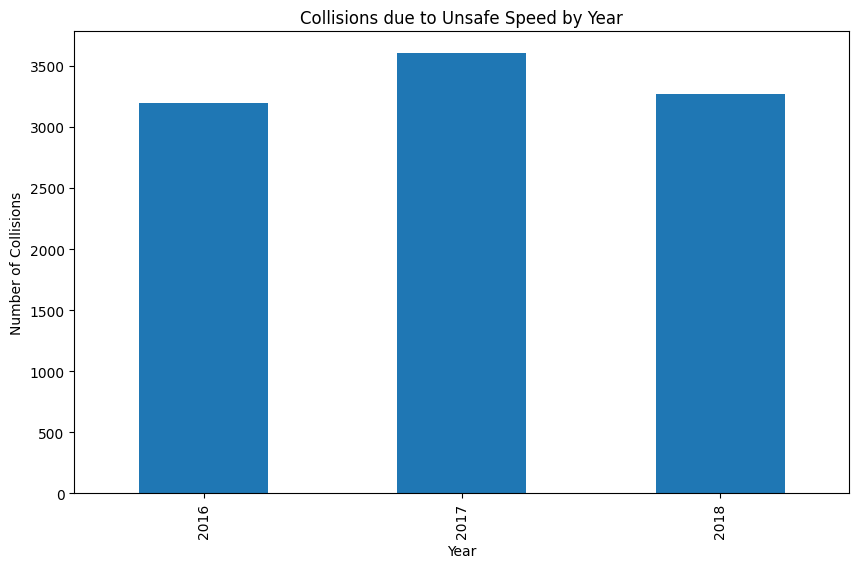

In [13]:
unsafe_speed_data = filtered_data[filtered_data['CONTRIBUTING FACTOR VEHICLE 1'] == 'Unsafe Speed']

yearly_unsafe_speed = unsafe_speed_data.groupby(unsafe_speed_data['CRASH DATE'].dt.year).size()
yearly_unsafe_speed.plot(kind='bar', figsize=(10,6))
plt.title('Collisions due to Unsafe Speed by Year')
plt.ylabel('Number of Collisions')
plt.xlabel('Year')
plt.show()


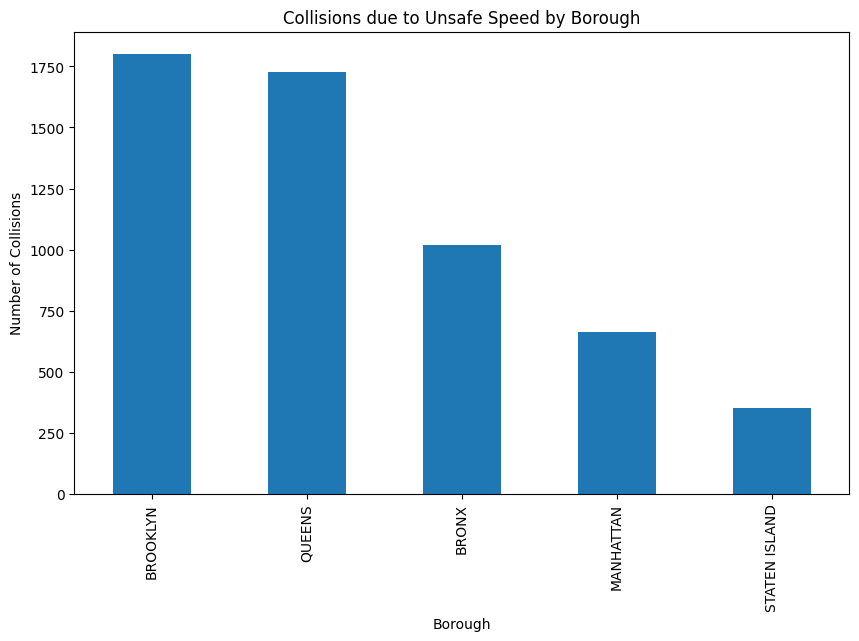

In [14]:
borough_unsafe_speed = unsafe_speed_data['BOROUGH'].value_counts()
borough_unsafe_speed.plot(kind='bar', figsize=(10,6))
plt.title('Collisions due to Unsafe Speed by Borough')
plt.ylabel('Number of Collisions')
plt.xlabel('Borough')
plt.show()


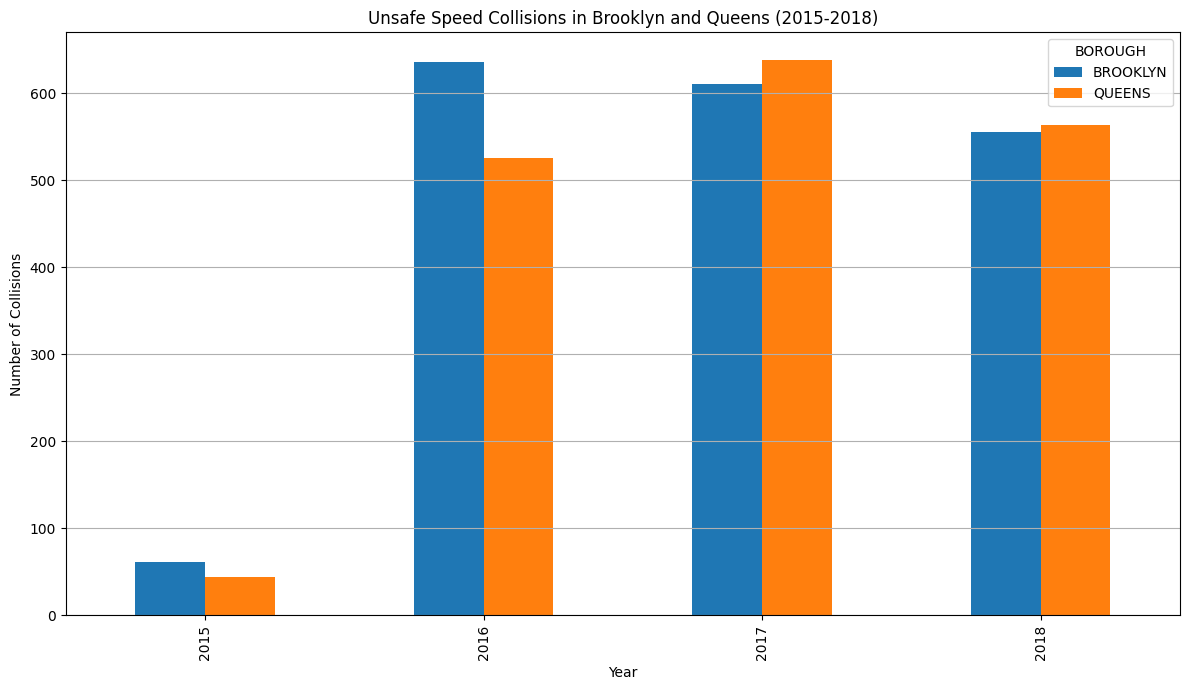

In [15]:
# Filter data for Brooklyn and Queens between 2015 and 2018
borough_data = data[(data['BOROUGH'].isin(['BROOKLYN', 'QUEENS'])) &
                   (data['CRASH DATE'].dt.year.isin([2015, 2016, 2017, 2018]))]

unsafe_speed_data = borough_data[borough_data['CONTRIBUTING FACTOR VEHICLE 1'] == 'Unsafe Speed']

grouped_data = unsafe_speed_data.groupby([unsafe_speed_data['CRASH DATE'].dt.year, 'BOROUGH']).size().unstack()

grouped_data.plot(kind='bar', figsize=(12, 7))
plt.title('Unsafe Speed Collisions in Brooklyn and Queens (2015-2018)')
plt.ylabel('Number of Collisions')
plt.xlabel('Year')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


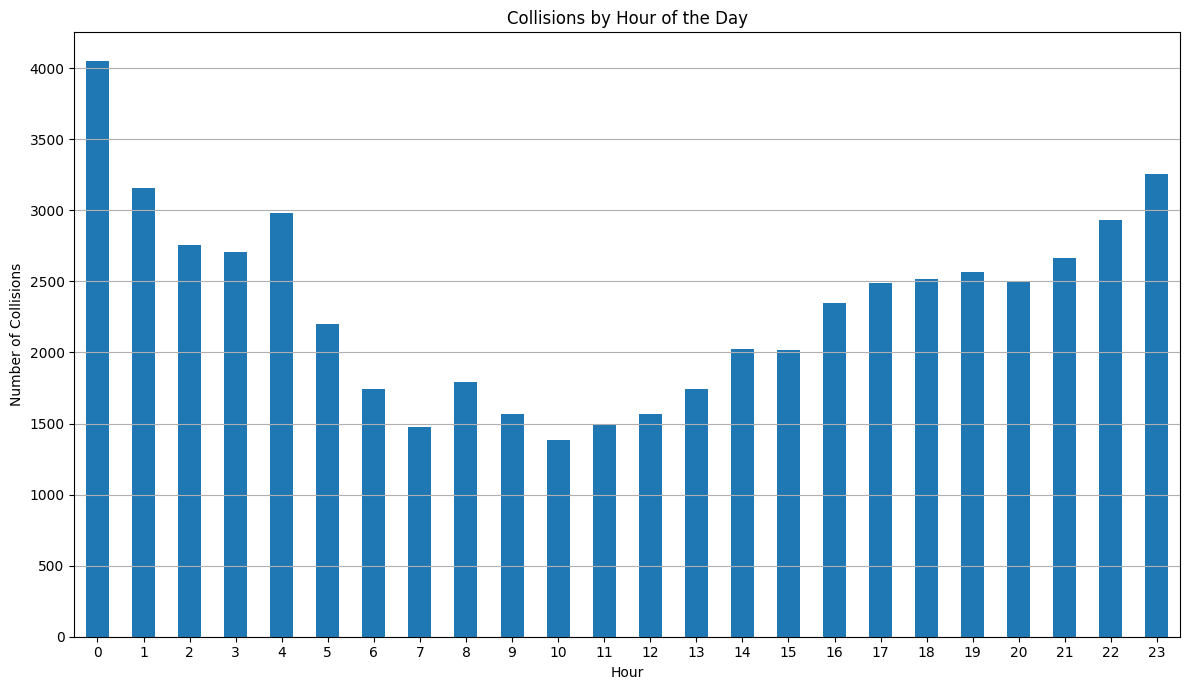

In [16]:
# Take hour from Crash TIme/ 24 hour format
data['CRASH HOUR'] = pd.to_datetime(data['CRASH TIME'], format='%H:%M:%S').dt.hour

hourly_data = data.groupby('CRASH HOUR').size()

hourly_data.plot(kind='bar', figsize=(12, 7))
plt.title('Collisions by Hour of the Day')
plt.ylabel('Number of Collisions')
plt.xlabel('Hour')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


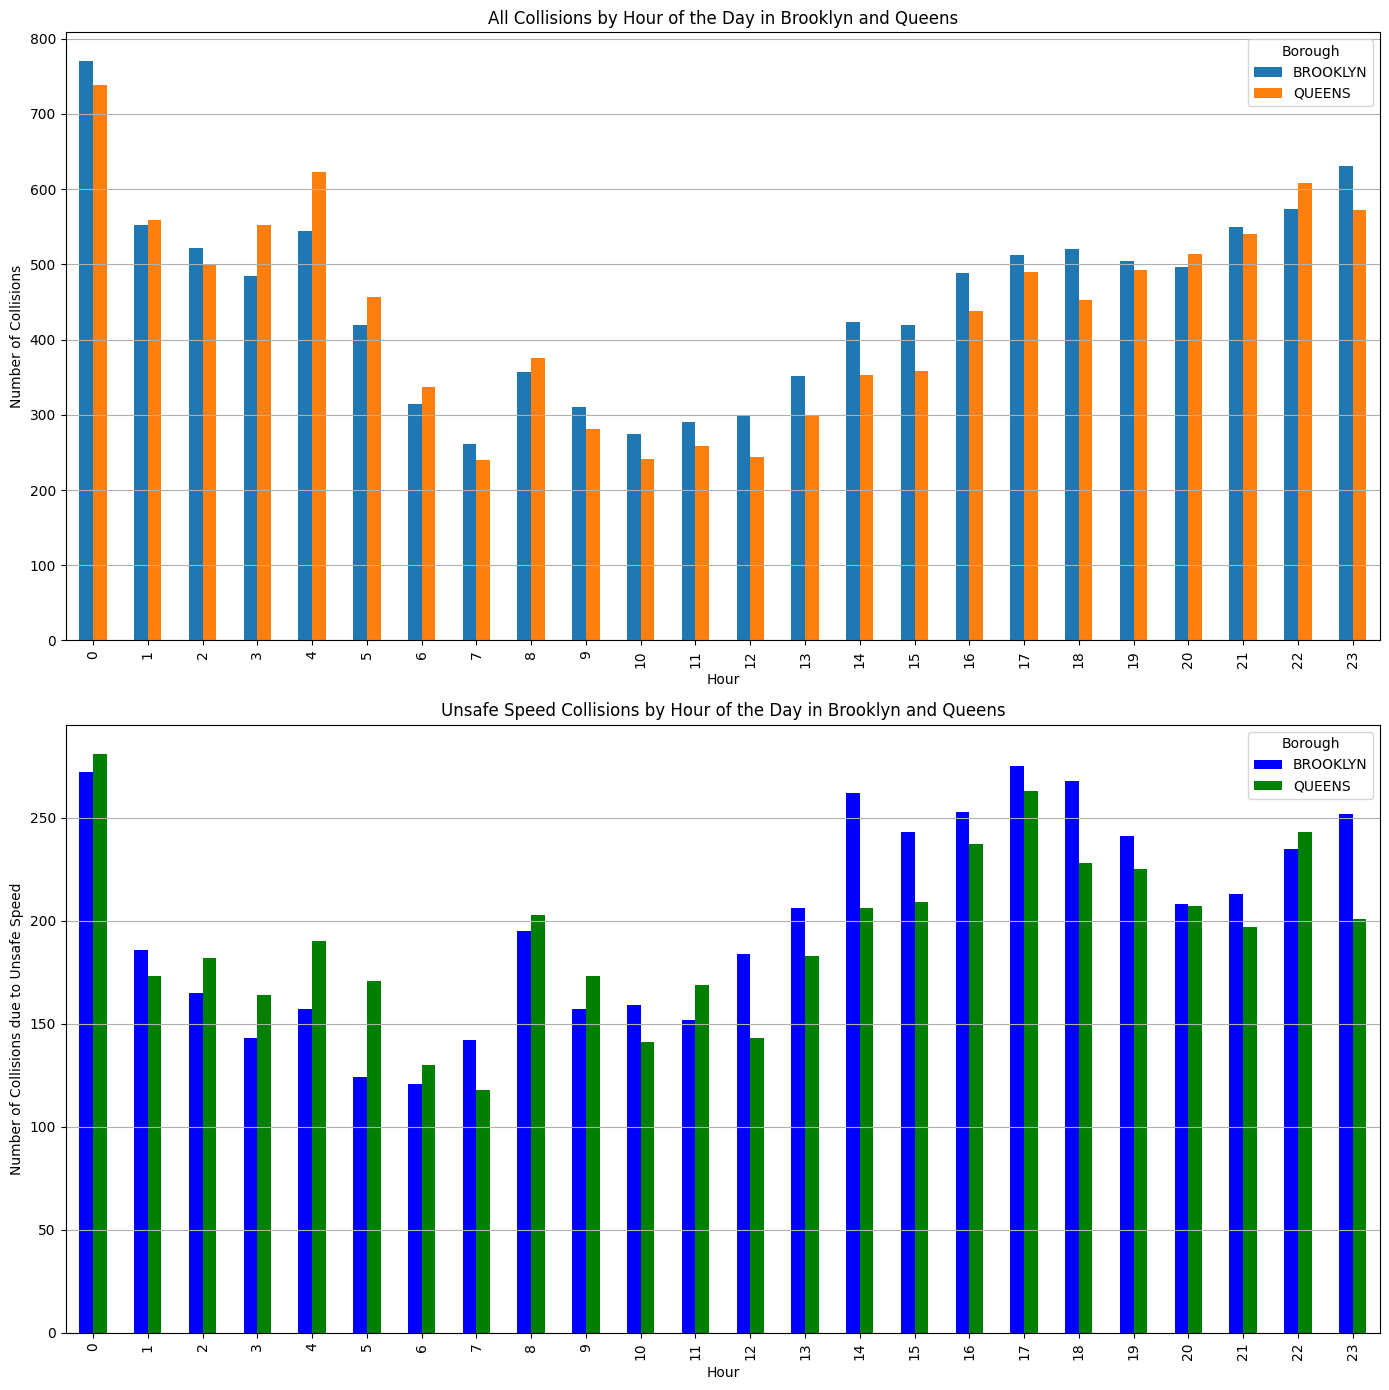

In [17]:
# Brooklyn and Queens again
bk_qns_data = data[data['BOROUGH'].isin(['BROOKLYN', 'QUEENS'])]

# Group by borough, then hour, then count number of collisions
borough_hourly_data = bk_qns_data.groupby(['BOROUGH', 'CRASH HOUR']).size().unstack(level=0)

# Filter only "Unsafe Speed" collisions
unsafe_speed_data = bk_qns_data[bk_qns_data['CONTRIBUTING FACTOR VEHICLE 1'] == 'Unsafe Speed']
unsafe_speed_hourly = unsafe_speed_data.groupby(['BOROUGH', 'CRASH HOUR']).size().unstack(level=0)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 14))

# First gragh: all collisions
borough_hourly_data.plot(kind='bar', ax=axes[0])
axes[0].set_title('All Collisions by Hour of the Day in Brooklyn and Queens')
axes[0].set_ylabel('Number of Collisions')
axes[0].set_xlabel('Hour')
axes[0].grid(axis='y')
axes[0].legend(title='Borough')

# Second gragh: Unsafe Speed collisions
unsafe_speed_hourly.plot(kind='bar', ax=axes[1], color=['blue', 'green'])
axes[1].set_title('Unsafe Speed Collisions by Hour of the Day in Brooklyn and Queens')
axes[1].set_ylabel('Number of Collisions due to Unsafe Speed')
axes[1].set_xlabel('Hour')
axes[1].grid(axis='y')
axes[1].legend(title='Borough')

plt.tight_layout()
plt.show()


ANALYZING COLLISION DATA BEFORE AND DURING PANDEMIC

In [19]:
data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])

data['year'] = data['CRASH DATE'].dt.year
data['month'] = data['CRASH DATE'].dt.month
monthly_collisions = data.groupby(['year', 'month']).size().reset_index(name='collision_count')



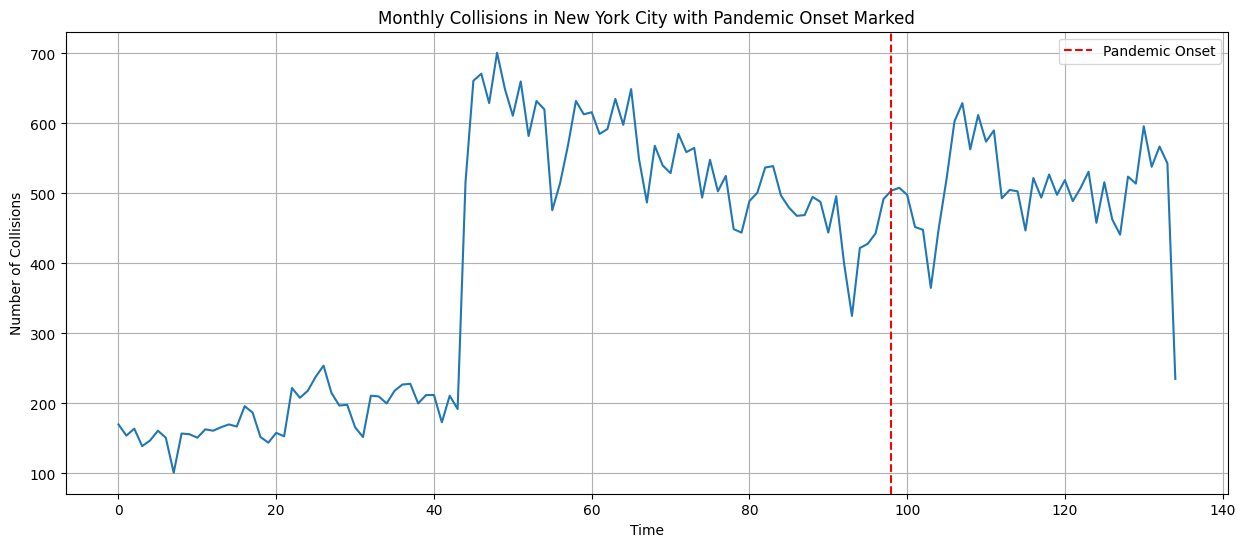

In [20]:
# marker for the pandemic onset 2020
plt.figure(figsize=(15,6))
plt.plot(monthly_collisions['collision_count'])
start_year = monthly_collisions['year'].min()
plt.axvline(x=((2020-start_year)*12)+2, color='r', linestyle='--', label='Pandemic Onset')
plt.title('Monthly Collisions in New York City with Pandemic Onset Marked')
plt.xlabel('Time')
plt.ylabel('Number of Collisions')
plt.legend()
plt.grid(True)
plt.show()


In [21]:
before_pandemic = data[data['CRASH DATE'] < '2020-03-01']
during_pandemic = data[data['CRASH DATE'] >= '2020-03-01']
print('Collisions Before Pandemic:', before_pandemic.shape[0])
print('Collisions During Pandemic:', during_pandemic.shape[0])


Collisions Before Pandemic: 34690
Collisions During Pandemic: 21258


Checking if the decrease is uniform across all boroughs or if some areas were affected more than others.

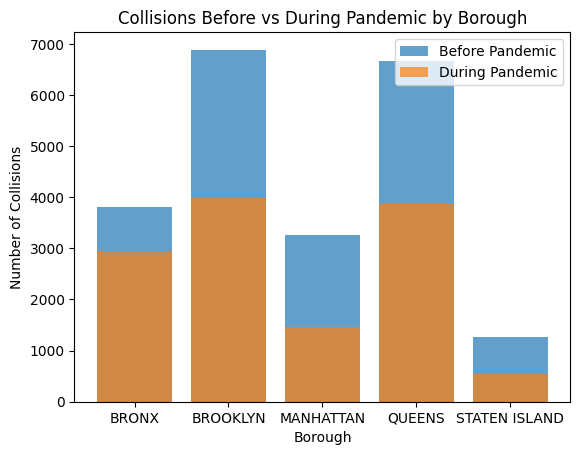

In [22]:
borough_collisions_before = before_pandemic.groupby('BOROUGH').size()
borough_collisions_during = during_pandemic.groupby('BOROUGH').size()
boroughs = borough_collisions_before.index
plt.bar(boroughs, borough_collisions_before, label='Before Pandemic', alpha=0.7)
plt.bar(boroughs, borough_collisions_during, label='During Pandemic', alpha=0.7)
plt.xlabel('Borough')
plt.ylabel('Number of Collisions')
plt.title('Collisions Before vs During Pandemic by Borough')
plt.legend()
plt.show()


Is it possible that patterns of when collisions occur may have shifted, especially if work commute patterns changed?

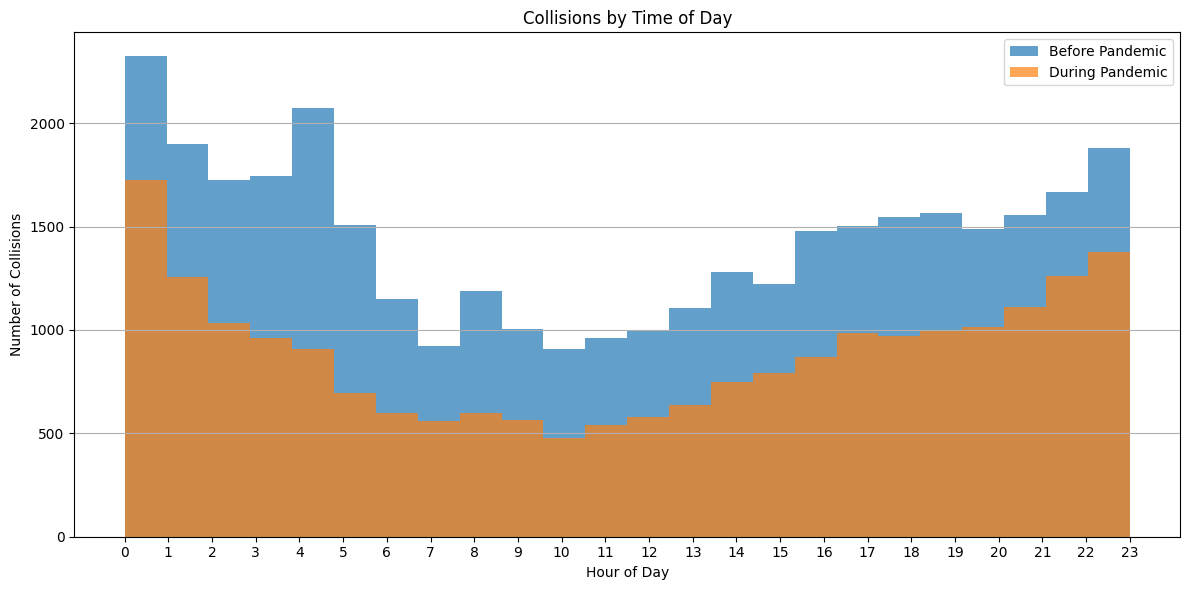

In [26]:
data['CRASH HOUR'] = pd.to_datetime(data['CRASH TIME'], format='%H:%M:%S').dt.hour

plt.figure(figsize=(12, 6))
plt.hist(before_pandemic['CRASH HOUR'], bins=24, alpha=0.7, label='Before Pandemic')
plt.hist(during_pandemic['CRASH HOUR'], bins=24, alpha=0.7, label='During Pandemic')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Collisions')
plt.title('Collisions by Time of Day')
plt.legend()
plt.xticks(range(24))
plt.grid(axis='y')
plt.tight_layout()
plt.show()


The chart trends similarly before and during the pandemic. a notable difference in the chart is around 3:30 am to 5 am where during the pandemic it makes a steady slope down. Before the pandemic there was a spike of collisions around that time.

T-Test to test statistical signifigance. First checking for normality, use QQ plot.

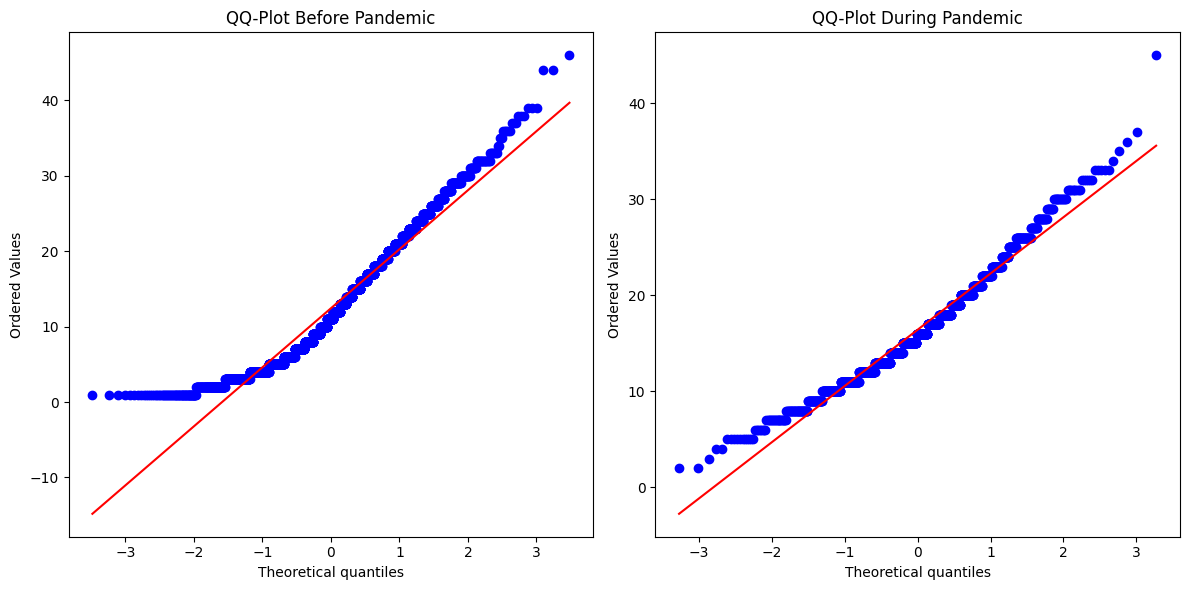

In [28]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# daily collisions
daily_before = before_pandemic.groupby('CRASH DATE').size()
daily_during = during_pandemic.groupby('CRASH DATE').size()

# QQ
plt.figure(figsize=(12, 6))
stats.probplot(daily_before, dist="norm", plot=plt.subplot(1, 2, 1))
plt.title('QQ-Plot Before Pandemic')

stats.probplot(daily_during, dist="norm", plot=plt.subplot(1, 2, 2))
plt.title('QQ-Plot During Pandemic')
plt.tight_layout()
plt.show()


relativly normalized

Levene test for equal variance

In [29]:
w, p_value = stats.levene(daily_before, daily_during)
print(f"Levene's test p-value: {p_value}")


Levene's test p-value: 7.354552024463212e-38


Equal variance = false

In [30]:
t_stat, p_val = stats.ttest_ind(daily_before, daily_during, equal_var=False)

print(f"T-statistic: {t_stat}, P-value: {p_val}")


T-statistic: -17.70950248761936, P-value: 3.9205580718803124e-67


The difference between the number of collisions during the pandemic versus before the pandemic is statistically significant. based on the t-test and the trends and observations from the graphs, there was a statistically significant reduction in the number of daily collisions during the pandemic compared to before the pandemic.